<a href="https://colab.research.google.com/github/SebaChamorro/gbm_learning/blob/main/notebooks/01_gmb_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro a Gradient Boosting (GBM) con scikit-learn

**Objetivo de este notebook**

- Entender la idea básica de un modelo de Gradient Boosting sobre árboles.
- Entrenar un primer modelo de regresión con `GradientBoostingRegressor`.
- Ver métricas de performance y feature importance.
- Dejar comentarios escritos sobre lo aprendido (como diario de aprendizaje).

Fecha: 2025-11-09  
Autor: Sebastián


In [2]:
# Si estás en Colab, podés instalar librerías adicionales así:
# (Para este ejemplo sólo usamos sklearn y matplotlib, que ya vienen en Colab.)

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


In [3]:
data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((16512, 8), (4128, 8))

In [5]:
gbm = GradientBoostingRegressor(
    n_estimators=200,      # número de árboles
    learning_rate=0.05,   # tamaño del paso
    max_depth=3,          # profundidad de cada árbol
    random_state=42
)

gbm.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42)

In [6]:
## Evaluar Modelo

y_pred = gbm.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R^2:  {r2:.4f}")


TypeError: got an unexpected keyword argument 'squared'

In [7]:
importances = gbm.feature_importances_
feature_names = X.columns

fi = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

fi


,feature,importance
0,MedInc,0.603933
5,AveOccup,0.126118
7,Longitude,0.113829
6,Latitude,0.092923
1,HouseAge,0.033340
2,AveRooms,0.022743
3,AveBedrms,0.005239
4,Population,0.001875


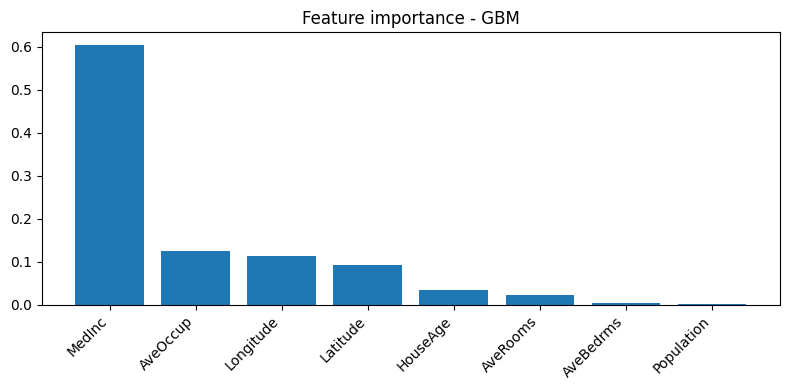

In [8]:
plt.figure(figsize=(8, 4))
plt.bar(fi["feature"], fi["importance"])
plt.xticks(rotation=45, ha="right")
plt.title("Feature importance - GBM")
plt.tight_layout()
plt.show()


## Reflexión personal sobre este experimento

- ¿Qué entendí de cómo funciona GBM?
- ¿Qué hiperparámetros toqué? ¿Qué pasa si subo `n_estimators` o bajo `learning_rate`?
- ¿Qué métricas voy a usar en problemas de pricing (RMSE, MAE, Gini, etc.)?
- ¿Qué me gustaría probar en el siguiente notebook?
